In [205]:
#Relevant imports and libraries!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sb
import math

In [174]:
#Read the dataset.
df = pd.read_csv('Anonymized Data for Data Interns.xlsx - Data Set.csv')
df.head(10)

,DT,ID,Sch,SiteName,Days Enr SY21_22,Days Present SY21_22,Days Abs SY21_22,Att Rate\n SY21_22,AttGrp\n SY21_22,Days Enr SY22_23,...,Special Ed,Cumulative Weighted Total GPA,Current Weighted Total GPA,ZipResidence,Contact Person 1 (Primary Contact),Contact Email 1 (Email of Contact Person 1),Contact Number 1 (Phone Number of Contact Person 1),Contact Person 2 (Secondary Contact),Contact Email 2 (Email of Contact Person 2),Contact Number 2 (Phone Number of Contact Person 2)
0,5/23/2024,277629,204,West Oakland Middle School,180.0,83.0,97.0,46.1%,Severe Chronic Absent,180.0,...,Not Special Ed,1.10,0.37,94607,YES,YES,YES,YES,YES,YES
1,5/23/2024,279268,204,West Oakland Middle School,NaN,NaN,NaN,NaN,NaN,67.0,...,Not Special Ed,3.27,3.72,94607,YES,YES,YES,NO,NO,NO
2,5/23/2024,279449,204,West Oakland Middle School,NaN,NaN,NaN,NaN,NaN,180.0,...,Not Special Ed,2.64,2.99,94607,YES,NO,NO,YES,YES,NO
3,5/23/2024,279753,204,West Oakland Middle School,180.0,140.0,40.0,77.8%,Severe Chronic Absent,180.0,...,Not Special Ed,2.82,3.13,94609,YES,NO,NO,YES,YES,YES
4,5/23/2024,279921,204,West Oakland Middle School,NaN,NaN,NaN,NaN,NaN,NaN,...,Not Special Ed,1.21,1.21,94609,YES,YES,NO,NO,NO,NO
5,5/23/2024,281058,204,West Oakland Middle School,180.0,164.0,16.0,91.1%,At Risk,180.0,...,Not Special Ed,3.39,2.80,94607,YES,NO,YES,YES,NO,YES
6,5/23/2024,281110,204,West Oakland Middle School,153.0,110.0,43.0,71.9%,Severe Chronic Absent,180.0,...,Not Special Ed,1.66,1.66,94607,YES,YES,YES,YES,YES,YES
7,5/23/2024,281195,204,West Oakland Middle School,180.0,154.0,26.0,85.6%,Severe Chronic Absent,180.0,...,Not Special Ed,2.64,2.80,94608,YES,NO,NO,YES,YES,YES
8,5/23/2024,281200,204,West Oakland Middle School,0.0,0.0,0.0,0.0%,Severe Chronic Absent,180.0,...,Not Special Ed,1.41,1.37,94607,YES,NO,NO,YES,YES,YES
9,5/23/2024,281378,204,West Oakland Middle School,180.0,164.0,16.0,91.1%,At Risk,180.0,...,Not Special Ed,2.03,2.03,94607,YES,NO,YES,YES,YES,YES


In [175]:
#Drop unnecessary columns.
df = df.drop(['DT', 
              'ID', 
              'Sch', 
              'SiteName', 
              'Days Enr SY21_22', 
              'Days Present SY21_22',
              'Days Abs SY21_22', 
              'Days Enr SY22_23',
              'Days Present SY22_23',
              'Days Abs SY22_23',
              'Days Enr SY23_24',
              'Days Present SY23_24',
              'Days Abs SY23_24',
              'Contact Person 1 (Primary Contact)',
              'Contact Email 1 (Email of Contact Person 1)',
              'Contact Number 1 (Phone Number of Contact Person 1)',
              'Contact Person 2 (Secondary Contact)',
              'Contact Email 2 (Email of Contact Person 2)',
              'Contact Number 2 (Phone Number of Contact Person 2)'], axis=1)

In [176]:
df.head(10)
df.dtypes


Att Rate\n SY21_22                object
AttGrp\n SY21_22                  object
Att Rate\n SY22_23                object
AttGrp\n SY22_23                  object
Att Rate\n SY23_24                object
AttGrp\n SY23_24                  object
Grade\nSY23_24                     int64
Gen                               object
Ethnicity                         object
Fluency                           object
HomeLang                          object
SED Status                        object
Special Ed                        object
Cumulative Weighted Total GPA    float64
Current Weighted Total GPA       float64
ZipResidence                       int64
dtype: object

In [177]:
#The attendance rate is not numerical! We are going to standardize this.
columns = ['Att Rate\n SY21_22', 'Att Rate\n SY22_23','Att Rate\n SY23_24']
for column in columns:
    df[column] = df[column].str.replace(r'.%$', '', regex=True).astype('float')

df['ZipResidence'] = df['ZipResidence'].astype('string')
df.dtypes

Att Rate\n SY21_22                      float64
AttGrp\n SY21_22                         object
Att Rate\n SY22_23                      float64
AttGrp\n SY22_23                         object
Att Rate\n SY23_24                      float64
AttGrp\n SY23_24                         object
Grade\nSY23_24                            int64
Gen                                      object
Ethnicity                                object
Fluency                                  object
HomeLang                                 object
SED Status                               object
Special Ed                               object
Cumulative Weighted Total GPA           float64
Current Weighted Total GPA              float64
ZipResidence                     string[python]
dtype: object

In [178]:
#One hot encoding categorical variables
df = pd.get_dummies(df, dtype=int)
df.head()

,Att Rate\n SY21_22,Att Rate\n SY22_23,Att Rate\n SY23_24,Grade\nSY23_24,Cumulative Weighted Total GPA,Current Weighted Total GPA,AttGrp\n SY21_22_At Risk,AttGrp\n SY21_22_Severe Chronic Absent,AttGrp\n SY22_23_At Risk,AttGrp\n SY22_23_Moderate Chronic Absent,...,ZipResidence_94606,ZipResidence_94607,ZipResidence_94608,ZipResidence_94609,ZipResidence_94610,ZipResidence_94611,ZipResidence_94612,ZipResidence_94618,ZipResidence_94621,ZipResidence_94702
0,46.0,40.6,32.8,8,1.10,0.37,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
1,NaN,86.6,93.3,8,3.27,3.72,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2,NaN,88.9,85.0,8,2.64,2.99,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3,77.0,76.7,88.3,7,2.82,3.13,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,NaN,NaN,49.3,7,1.21,1.21,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [179]:
#Let's look at the cross correlations. We want to elimiinate potentially highly correlated variables
corr = df.corr()
corr


[f"{corr.columns[i]} and {corr.columns[j]}" for i, j in zip(*np.where(np.abs(corr.values) >= 0.7)) if i < j]

['Att Rate\n SY22_23 and AttGrp\n SY22_23_Severe Chronic Absent',
 'Att Rate\n SY23_24 and AttGrp\n SY23_24_Severe Chronic Absent',
 'Cumulative Weighted Total GPA and Current Weighted Total GPA',
 'Gen_F and Gen_M',
 'Ethnicity_African American and Fluency_EO',
 'Ethnicity_African American and HomeLang_English',
 'Ethnicity_Latino and HomeLang_Spanish',
 'Ethnicity_White and HomeLang_Arabic',
 'Fluency_EL and Fluency_EO',
 'Fluency_EL and HomeLang_English',
 'Fluency_EO and HomeLang_English',
 'Fluency_IFEP and ZipResidence_94702',
 'HomeLang_Khmer and ZipResidence_94601',
 'SED Status_Not SED and SED Status_SED',
 'Special Ed_Not Special Ed and Special Ed_Special Ed']

In [232]:
corr

,Att Rate\n SY21_22,Att Rate\n SY22_23,Att Rate\n SY23_24,Grade\nSY23_24,Cumulative Weighted Total GPA,Current Weighted Total GPA,AttGrp\n SY21_22_At Risk,AttGrp\n SY21_22_Severe Chronic Absent,AttGrp\n SY22_23_At Risk,AttGrp\n SY22_23_Moderate Chronic Absent,...,ZipResidence_94606,ZipResidence_94607,ZipResidence_94608,ZipResidence_94609,ZipResidence_94610,ZipResidence_94611,ZipResidence_94612,ZipResidence_94618,ZipResidence_94621,ZipResidence_94702
Att Rate\n SY21_22,1.000000,0.402259,0.522850,0.005123,0.377203,0.331739,0.274257,-0.274257,0.278182,0.092932,...,-0.030177,-0.001937,0.150589,-0.290979,0.056339,0.002893,-0.000913,0.085948,-0.053583,0.007779
Att Rate\n SY22_23,0.402259,1.000000,0.443956,0.000521,0.314266,0.168551,0.137007,-0.205984,0.486875,0.156583,...,0.170261,-0.026355,-0.097554,-0.135278,0.065684,0.027598,0.028270,0.076997,-0.007229,0.018690
Att Rate\n SY23_24,0.522850,0.443956,1.000000,0.067076,0.460781,0.491874,0.047655,-0.214784,0.208684,0.033174,...,0.075354,0.001598,0.130168,-0.104472,0.024591,0.024584,-0.109286,0.074906,-0.056667,0.007385
Grade\nSY23_24,0.005123,0.000521,0.067076,1.000000,-0.118681,-0.043137,-0.143404,-0.010539,0.075410,-0.017414,...,0.113072,-0.112840,0.207046,-0.146782,0.209750,-0.113027,0.097288,-0.113027,-0.010539,-0.113027
Cumulative Weighted Total GPA,0.377203,0.314266,0.460781,-0.118681,1.000000,0.908884,0.077663,-0.108677,0.140014,0.056314,...,-0.038893,-0.057549,-0.023043,0.031474,0.156919,0.148062,-0.021397,0.175369,-0.074476,0.145877
Current Weighted Total GPA,0.331739,0.168551,0.491874,-0.043137,0.908884,1.000000,-0.002204,-0.069595,0.058112,0.028189,...,-0.051288,-0.098431,0.094515,0.074030,0.153565,0.131197,-0.074162,0.168028,-0.094879,0.141585
AttGrp\n SY21_22_At Risk,0.274257,0.137007,0.047655,-0.143404,0.077663,-0.002204,1.000000,-0.293972,0.189017,0.208171,...,0.150188,-0.024980,-0.030557,-0.246270,0.018712,0.055527,-0.019066,0.055527,0.125988,0.055527
AttGrp\n SY21_22_Severe Chronic Absent,-0.274257,-0.205984,-0.214784,-0.010539,-0.108677,-0.069595,-0.293972,1.000000,-0.108995,0.035533,...,-0.044151,0.027538,0.026948,0.149318,-0.033005,-0.016323,-0.050443,-0.016323,-0.037037,-0.016323
AttGrp\n SY22_23_At Risk,0.278182,0.486875,0.208684,0.075410,0.140014,0.058112,0.189017,-0.108995,1.000000,-0.383422,...,0.022929,0.034323,-0.051315,-0.119842,0.002857,-0.048037,-0.012613,0.149764,-0.019234,-0.048037
AttGrp\n SY22_23_Moderate Chronic Absent,0.092932,0.156583,0.033174,-0.017414,0.056314,0.028189,0.208171,0.035533,-0.383422,1.000000,...,-0.014120,-0.100396,0.017236,-0.067287,0.068608,0.125286,0.136224,-0.057423,0.118445,0.125286


In [180]:
#Interestingly, we don't see high correlation in subsequent attendance rates or attendance groups! We can drop previous year info when we do our log regression.
#We can eliminate one of the quantitative GPA measures - let's keep current weighted total GPA for a better picture of a student's current performance. 
df = df.drop(['Cumulative Weighted Total GPA',
        'AttGrp\n SY21_22_At Risk',
       'AttGrp\n SY21_22_Severe Chronic Absent', 'AttGrp\n SY22_23_At Risk',
       'AttGrp\n SY22_23_Moderate Chronic Absent',
       'AttGrp\n SY22_23_Satistfactory',
       'AttGrp\n SY22_23_Severe Chronic Absent', 'AttGrp\n SY23_24_At Risk',
       'AttGrp\n SY23_24_Moderate Chronic Absent',
       'AttGrp\n SY23_24_Satisfactory'], axis=1)

In [181]:
df = df.drop(['Att Rate\n SY21_22', 'Att Rate\n SY22_23', 'Att Rate\n SY23_24'], axis=1)

### Let's do our logistic regression

In [182]:
#Let's do our logistic regression
#Creating a classifier column and dropping the encoded categories for 2023-2024
def is_chron_abs(row):
    if row['AttGrp\n SY23_24_Severe Chronic Absent'] == 1:
        row['is_chron_abs'] = 1
    else:
        row['is_chron_abs'] = 0 

df.apply(is_chron_abs, axis=1)
df['Is_chron_abs'] = [1 if x==1 else 0 for x in df['AttGrp\n SY23_24_Severe Chronic Absent']]
df = df.drop(['AttGrp\n SY23_24_Severe Chronic Absent'], axis=1)

In [183]:
#what columns do we have left?
df.columns

Index(['Grade\nSY23_24', 'Current Weighted Total GPA', 'Gen_F', 'Gen_M',
       'Ethnicity_African American', 'Ethnicity_Asian', 'Ethnicity_Latino',
       'Ethnicity_Multiple Ethnicity', 'Ethnicity_Not Reported',
       'Ethnicity_Pacific Islander', 'Ethnicity_White', 'Fluency_EL',
       'Fluency_EO', 'Fluency_IFEP', 'Fluency_RFEP', 'HomeLang_Arabic',
       'HomeLang_English', 'HomeLang_Farsi', 'HomeLang_Filipino',
       'HomeLang_French', 'HomeLang_Khmer', 'HomeLang_Other Lang',
       'HomeLang_Punjabi', 'HomeLang_Spanish', 'HomeLang_Urdu',
       'SED Status_Not SED', 'SED Status_SED', 'Special Ed_Not Special Ed',
       'Special Ed_Special Ed', 'ZipResidence_94565', 'ZipResidence_94601',
       'ZipResidence_94603', 'ZipResidence_94605', 'ZipResidence_94606',
       'ZipResidence_94607', 'ZipResidence_94608', 'ZipResidence_94609',
       'ZipResidence_94610', 'ZipResidence_94611', 'ZipResidence_94612',
       'ZipResidence_94618', 'ZipResidence_94621', 'ZipResidence_94702',
   

In [187]:
#impute values with medians
df = df.fillna(df.median())

feature_cols = df.drop(['Is_chron_abs'], axis=1).columns
X = df[feature_cols] # Features
y = df['Is_chron_abs']


In [195]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

[[22  5]
 [ 4  4]]
                       precision    recall  f1-score   support

is chronically absent       0.85      0.81      0.83        27
               is not       0.44      0.50      0.47         8

             accuracy                           0.74        35
            macro avg       0.65      0.66      0.65        35
         weighted avg       0.75      0.74      0.75        35



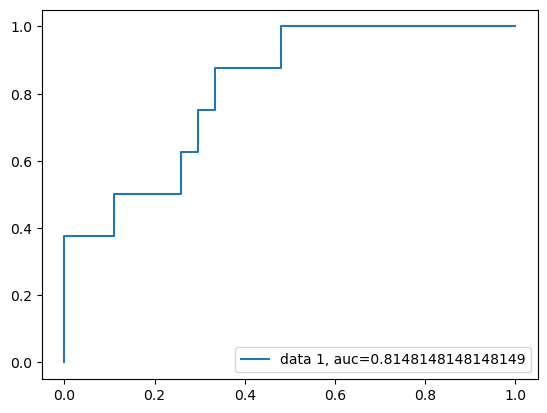

In [197]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=target_names))

y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [236]:
#Now to look at feature importance.
results = pd.DataFrame(zip(X_train.columns, np.transpose(logreg.coef_.flatten())), columns=['features', 'coef']).sort_values(by=['coef'], ascending=False)
results['odds_ratio'] = np.exp(results['coef'])
results['odds_increase_chance_severe'] = ((results['odds_ratio'] - 1.0)*100).astype(str) + '%'
results

,features,coef,odds_ratio,odds_increase_chance_severe
41,ZipResidence_94621,0.845202,2.328448,132.8448171650157%
24,HomeLang_Urdu,0.733241,2.081816,108.18164511044573%
9,Ethnicity_Pacific Islander,0.672689,1.959499,95.94988935529105%
12,Fluency_EO,0.495507,1.641330,64.13298585475498%
16,HomeLang_English,0.495507,1.641330,64.13298585475498%
27,Special Ed_Not Special Ed,0.471274,1.602034,60.20338365499973%
37,ZipResidence_94610,0.401560,1.494154,49.41538225120099%
39,ZipResidence_94612,0.399321,1.490811,49.08113672268715%
2,Gen_F,0.356361,1.428123,42.81225436081488%
23,HomeLang_Spanish,0.337427,1.401337,40.13374147063627%


## Current overall attendance rate

In [271]:
df = pd.read_csv('Anonymized Data for Data Interns.xlsx - Data Set.csv')
columns = ['Att Rate\n SY21_22', 'Att Rate\n SY22_23','Att Rate\n SY23_24']
for column in columns:
    df[column] = df[column].str.replace(r'.%$', '', regex=True).astype('float')
    
days_present = df['Days Present SY23_24'].sum()
print(days_present)
days_enrolled = df['Days Enr SY23_24'].sum()
print(days_enrolled)
overall_rate = days_present/days_enrolled
print(overall_rate)

19099
23167
0.8244054042387879


In [275]:
avg_absent = df['Days Abs SY23_24'].mean()

In [276]:
avg_absent

29.057142857142857